In [1]:
# cropped all images to circle 

import cv2
import numpy as np
import os

# Function to crop and save images
def crop_and_save_images(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through each image from 1.jpg to 27.jpg
    for i in range(1, 28):
        # Read the image
        image_path = os.path.join(input_folder, f"{i}.jpg")
        image = cv2.imread(image_path)

        if image is None:
            print(f"Could not read image {image_path}")
            continue

        # Get the center of the image
        center = (image.shape[1] // 2, image.shape[0] // 2)

        # Create a mask with a circular shape
        mask = np.zeros_like(image)
        cv2.circle(mask, center, min(center), (255, 255, 255), -1, cv2.LINE_AA)

        # Create a white background image
        background = np.ones_like(image) * 255

        # Apply the mask to the image - to extract region of interest
        result = cv2.bitwise_and(image, mask)
        background = cv2.bitwise_and(background, cv2.bitwise_not(mask))

        # Combine the cropped circular region with the white background 
        result = cv2.add(result, background)

        # Save the result in pixel cropped folder
        output_path = os.path.join(output_folder, f"{i}_cropped.jpg")
        cv2.imwrite(output_path, result)

        print(f"Image {i} cropped and saved as {output_path}")

# Input and output folder paths
input_folder = "samples_from_pixel"
output_folder = "pixel_cropped"

# Crop and save images
crop_and_save_images(input_folder, output_folder)


Image 1 cropped and saved as pixel_cropped\1_cropped.jpg
Image 2 cropped and saved as pixel_cropped\2_cropped.jpg
Image 3 cropped and saved as pixel_cropped\3_cropped.jpg
Image 4 cropped and saved as pixel_cropped\4_cropped.jpg
Image 5 cropped and saved as pixel_cropped\5_cropped.jpg
Image 6 cropped and saved as pixel_cropped\6_cropped.jpg
Image 7 cropped and saved as pixel_cropped\7_cropped.jpg
Image 8 cropped and saved as pixel_cropped\8_cropped.jpg
Image 9 cropped and saved as pixel_cropped\9_cropped.jpg
Image 10 cropped and saved as pixel_cropped\10_cropped.jpg
Image 11 cropped and saved as pixel_cropped\11_cropped.jpg
Image 12 cropped and saved as pixel_cropped\12_cropped.jpg
Image 13 cropped and saved as pixel_cropped\13_cropped.jpg
Image 14 cropped and saved as pixel_cropped\14_cropped.jpg
Image 15 cropped and saved as pixel_cropped\15_cropped.jpg
Image 16 cropped and saved as pixel_cropped\16_cropped.jpg
Image 17 cropped and saved as pixel_cropped\17_cropped.jpg
Image 18 croppe

In [14]:
# Apply Noise reduction (Guassian Blur)

import cv2
import numpy as np
import os

# Function to apply Gaussian blur
def process_image(image_path, output_blurred_path):
    # Load the image
    image = cv2.imread(image_path,0)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Save blurred image by pixel blurred folder
    cv2.imwrite(output_blurred_path, blurred_image)

    # Print message
    print(f"Processed and stored {image_path.split(os.sep)[-1]}")

# Process all images from 1_cropped.jpg to 27_cropped.jpg
source_folder = 'pixel_cropped'
output_blurred_folder = 'pixel_blurred'

for i in range(1, 28):
    image_path = os.path.join(source_folder, f"{i}_cropped.jpg")
    output_blurred_path = os.path.join(output_blurred_folder, f"{i}_blurred.jpg")

    # Apply processing to the image
    process_image(image_path, output_blurred_path)


Processed and stored 1_cropped.jpg
Processed and stored 2_cropped.jpg
Processed and stored 3_cropped.jpg
Processed and stored 4_cropped.jpg
Processed and stored 5_cropped.jpg
Processed and stored 6_cropped.jpg
Processed and stored 7_cropped.jpg
Processed and stored 8_cropped.jpg
Processed and stored 9_cropped.jpg
Processed and stored 10_cropped.jpg
Processed and stored 11_cropped.jpg
Processed and stored 12_cropped.jpg
Processed and stored 13_cropped.jpg
Processed and stored 14_cropped.jpg
Processed and stored 15_cropped.jpg
Processed and stored 16_cropped.jpg
Processed and stored 17_cropped.jpg
Processed and stored 18_cropped.jpg
Processed and stored 19_cropped.jpg
Processed and stored 20_cropped.jpg
Processed and stored 21_cropped.jpg
Processed and stored 22_cropped.jpg
Processed and stored 23_cropped.jpg
Processed and stored 24_cropped.jpg
Processed and stored 25_cropped.jpg
Processed and stored 26_cropped.jpg
Processed and stored 27_cropped.jpg


In [15]:
#Apply Laplacian

import cv2
import numpy as np
import os

# Function to apply Laplacian
def apply_laplacian(image_path, output_laplacian_path):
    # Load the image in grayscale
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Apply Laplacian to detect edges
    laplacian_image = cv2.Laplacian(image, cv2.CV_64F)
    laplacian_image = np.uint8(np.absolute(laplacian_image))  # Convert to 8-bit image

    # Save the Laplacian image as folder of pixal laplacian
    cv2.imwrite(output_laplacian_path, laplacian_image)

    # Print message
    print(f"Laplacian image saved as {output_laplacian_path}")

# Process all images from 1_blurred.jpg to 27_blurred.jpg
source_blurred_folder = 'pixel_blurred'
output_laplacian_folder = 'pixel_laplacian'

# Create output directory if it doesn't exist
os.makedirs(output_laplacian_folder, exist_ok=True)

for i in range(1, 28):
    image_path = os.path.join(source_blurred_folder, f"{i}_blurred.jpg")
    output_laplacian_path = os.path.join(output_laplacian_folder, f"{i}_laplacian.jpg")

    # Apply Laplacian
    apply_laplacian(image_path, output_laplacian_path)

Laplacian image saved as pixel_laplacian\1_laplacian.jpg
Laplacian image saved as pixel_laplacian\2_laplacian.jpg
Laplacian image saved as pixel_laplacian\3_laplacian.jpg
Laplacian image saved as pixel_laplacian\4_laplacian.jpg
Laplacian image saved as pixel_laplacian\5_laplacian.jpg
Laplacian image saved as pixel_laplacian\6_laplacian.jpg
Laplacian image saved as pixel_laplacian\7_laplacian.jpg
Laplacian image saved as pixel_laplacian\8_laplacian.jpg
Laplacian image saved as pixel_laplacian\9_laplacian.jpg
Laplacian image saved as pixel_laplacian\10_laplacian.jpg
Laplacian image saved as pixel_laplacian\11_laplacian.jpg
Laplacian image saved as pixel_laplacian\12_laplacian.jpg
Laplacian image saved as pixel_laplacian\13_laplacian.jpg
Laplacian image saved as pixel_laplacian\14_laplacian.jpg
Laplacian image saved as pixel_laplacian\15_laplacian.jpg
Laplacian image saved as pixel_laplacian\16_laplacian.jpg
Laplacian image saved as pixel_laplacian\17_laplacian.jpg
Laplacian image saved a

In [16]:
# Substract the laplacian image from orignal

import cv2
import numpy as np
import os

# Function to subtract Laplacian from blurred image
def subtract_laplacian_from_blurred(blurred_image_path, laplacian_image_path, output_subtracted_path):
    # Load the blurred and Laplacian images in grayscale
    blurred_image = cv2.imread(blurred_image_path)
    laplacian_image = cv2.imread(laplacian_image_path)

    if blurred_image is None or laplacian_image is None:
        print(f"Error loading images: {blurred_image_path} or {laplacian_image_path}")
        return

    # Ensure the images have the same dimensions
    if blurred_image.shape != laplacian_image.shape:
        print(f"Image size mismatch: {blurred_image_path} and {laplacian_image_path}")
        return

    # Subtract the Laplacian image from the blurred image
    subtracted_image = cv2.subtract(blurred_image, laplacian_image)

    # Save the resulting image
    cv2.imwrite(output_subtracted_path, subtracted_image)

    # Print message
    print(f"Subtracted image saved as {output_subtracted_path}")

# Process all images from 1_blurred.jpg and 1_laplacian.jpg to 27_blurred.jpg and 27_laplacian.jpg
source_blurred_folder = 'pixel_blurred'
source_laplacian_folder = 'pixel_laplacian'
output_subtracted_folder = 'pixel_subtracted'

# Create output directory if it doesn't exist
os.makedirs(output_subtracted_folder, exist_ok=True)

for i in range(1, 28):
    blurred_image_path = os.path.join(source_blurred_folder, f"{i}_blurred.jpg")
    laplacian_image_path = os.path.join(source_laplacian_folder, f"{i}_laplacian.jpg")
    output_subtracted_path = os.path.join(output_subtracted_folder, f"{i}_subtracted.jpg")

    # Subtract Laplacian from blurred image
    subtract_laplacian_from_blurred(blurred_image_path, laplacian_image_path, output_subtracted_path)

Subtracted image saved as pixel_subtracted\1_subtracted.jpg
Subtracted image saved as pixel_subtracted\2_subtracted.jpg
Subtracted image saved as pixel_subtracted\3_subtracted.jpg
Subtracted image saved as pixel_subtracted\4_subtracted.jpg
Subtracted image saved as pixel_subtracted\5_subtracted.jpg
Subtracted image saved as pixel_subtracted\6_subtracted.jpg
Subtracted image saved as pixel_subtracted\7_subtracted.jpg
Subtracted image saved as pixel_subtracted\8_subtracted.jpg
Subtracted image saved as pixel_subtracted\9_subtracted.jpg
Subtracted image saved as pixel_subtracted\10_subtracted.jpg
Subtracted image saved as pixel_subtracted\11_subtracted.jpg
Subtracted image saved as pixel_subtracted\12_subtracted.jpg
Subtracted image saved as pixel_subtracted\13_subtracted.jpg
Subtracted image saved as pixel_subtracted\14_subtracted.jpg
Subtracted image saved as pixel_subtracted\15_subtracted.jpg
Subtracted image saved as pixel_subtracted\16_subtracted.jpg
Subtracted image saved as pixel_s

In [4]:
import cv2
import numpy as np
import os

# Function to apply dilation to an image
    def apply_dilation(image_path, output_dilated_path, kernel_size=(3,3), iterations=5):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Create a kernel for dilation
    kernel = np.ones(kernel_size, np.uint8)

    # Apply dilation
    dilated_image = cv2.dilate(image, kernel, iterations=iterations)

    # Save the resulting image
    cv2.imwrite(output_dilated_path, dilated_image)

    # Print message
    print(f"Dilated image saved as {output_dilated_path}")

# Process all subtracted images from 1_subtracted.jpg to 27_subtracted.jpg
source_subtracted_folder = 'pixel_subtracted'
output_dilated_folder = 'pixel_dilated'

# Create output directory if it doesn't exist
os.makedirs(output_dilated_folder, exist_ok=True)

for i in range(1, 28):
    subtracted_image_path = os.path.join(source_subtracted_folder, f"{i}_subtracted.jpg")
    output_dilated_path = os.path.join(output_dilated_folder, f"{i}_dilated.jpg")

    # Apply dilation to the subtracted image
    apply_dilation(subtracted_image_path, output_dilated_path)

Dilated image saved as pixel_dilated\1_dilated.jpg
Dilated image saved as pixel_dilated\2_dilated.jpg
Dilated image saved as pixel_dilated\3_dilated.jpg
Dilated image saved as pixel_dilated\4_dilated.jpg
Dilated image saved as pixel_dilated\5_dilated.jpg
Dilated image saved as pixel_dilated\6_dilated.jpg
Dilated image saved as pixel_dilated\7_dilated.jpg
Dilated image saved as pixel_dilated\8_dilated.jpg
Dilated image saved as pixel_dilated\9_dilated.jpg
Dilated image saved as pixel_dilated\10_dilated.jpg
Dilated image saved as pixel_dilated\11_dilated.jpg
Dilated image saved as pixel_dilated\12_dilated.jpg
Dilated image saved as pixel_dilated\13_dilated.jpg
Dilated image saved as pixel_dilated\14_dilated.jpg
Dilated image saved as pixel_dilated\15_dilated.jpg
Dilated image saved as pixel_dilated\16_dilated.jpg
Dilated image saved as pixel_dilated\17_dilated.jpg
Dilated image saved as pixel_dilated\18_dilated.jpg
Dilated image saved as pixel_dilated\19_dilated.jpg
Dilated image saved a

In [4]:
#Histogram graph for each image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Folder containing the subtracted images
output_subtracted_folder = 'pixel_subtracted'
histogram_folder = 'pixel_histograms'

# Create histogram directory if it doesn't exist
os.makedirs(histogram_folder, exist_ok=True)

# Generate and plot the histogram for each subtracted image
for i in range(1, 28):
    image_path = os.path.join(output_subtracted_folder, f"{i}_subtracted.jpg")
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        print(f"Error loading image: {image_path}")
        continue

    # Calculate the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot the histogram
    plt.figure()
    plt.title(f"Histogram for {os.path.basename(image_path)}")
    plt.xlabel("Intensity Value")
    plt.ylabel("Pixel Count")
    plt.plot(histogram)
    plt.xlim([0, 256])

    # Save the histogram plot
    histogram_path = os.path.join(histogram_folder, f"{i}_histogram.png")
    plt.savefig(histogram_path)
    plt.close()

    # Print message
    print(f"Histogram for {os.path.basename(image_path)} saved as {histogram_path}")

Histogram for 1_subtracted.jpg saved as pixel_histograms\1_histogram.png
Histogram for 2_subtracted.jpg saved as pixel_histograms\2_histogram.png
Histogram for 3_subtracted.jpg saved as pixel_histograms\3_histogram.png
Histogram for 4_subtracted.jpg saved as pixel_histograms\4_histogram.png
Histogram for 5_subtracted.jpg saved as pixel_histograms\5_histogram.png
Histogram for 6_subtracted.jpg saved as pixel_histograms\6_histogram.png
Histogram for 7_subtracted.jpg saved as pixel_histograms\7_histogram.png
Histogram for 8_subtracted.jpg saved as pixel_histograms\8_histogram.png
Histogram for 9_subtracted.jpg saved as pixel_histograms\9_histogram.png
Histogram for 10_subtracted.jpg saved as pixel_histograms\10_histogram.png
Histogram for 11_subtracted.jpg saved as pixel_histograms\11_histogram.png
Histogram for 12_subtracted.jpg saved as pixel_histograms\12_histogram.png
Histogram for 13_subtracted.jpg saved as pixel_histograms\13_histogram.png
Histogram for 14_subtracted.jpg saved as pi

Extracted black fungi and saved as pixel_fungi\1_fungi.jpg
Extracted black fungi and saved as pixel_fungi\2_fungi.jpg
Extracted black fungi and saved as pixel_fungi\3_fungi.jpg
Extracted black fungi and saved as pixel_fungi\4_fungi.jpg
Extracted black fungi and saved as pixel_fungi\5_fungi.jpg
Extracted black fungi and saved as pixel_fungi\6_fungi.jpg
Extracted black fungi and saved as pixel_fungi\7_fungi.jpg
Extracted black fungi and saved as pixel_fungi\8_fungi.jpg
Extracted black fungi and saved as pixel_fungi\9_fungi.jpg
Extracted black fungi and saved as pixel_fungi\10_fungi.jpg
Extracted black fungi and saved as pixel_fungi\11_fungi.jpg
Extracted black fungi and saved as pixel_fungi\12_fungi.jpg
Extracted black fungi and saved as pixel_fungi\13_fungi.jpg
Extracted black fungi and saved as pixel_fungi\14_fungi.jpg
Extracted black fungi and saved as pixel_fungi\15_fungi.jpg
Extracted black fungi and saved as pixel_fungi\16_fungi.jpg
Extracted black fungi and saved as pixel_fungi\17

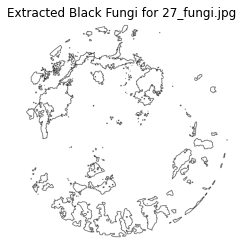

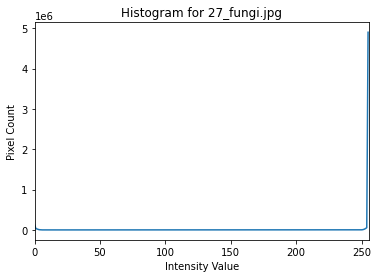

In [18]:
# Extract black pixels area

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to extract black-colored regions using HSV color space
def extract_black_fungi(image_path, output_path, v_threshold=100, block_size=11, C=2):
    # Load the image
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extract the V channel (Value channel)
    v_channel = hsv_image[:, :, 2]

    # Apply binary inverse thresholding on the V channel to isolate dark regions
    _, v_thresh = cv2.threshold(v_channel, v_threshold, 255, cv2.THRESH_BINARY_INV)

    # Optionally, apply adaptive thresholding to refine extraction
    adaptive_thresh_image = cv2.adaptiveThreshold(v_thresh, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

    # Save the resulting image
    cv2.imwrite(output_path, adaptive_thresh_image)

    # Print message
    print(f"Extracted black fungi and saved as {output_path}")

# Folder containing the images
output_dilated_folder = 'pixel_dilated'
output_fungi_folder = 'pixel_fungi'

# Create output directory if it doesn't exist
os.makedirs(output_fungi_folder, exist_ok=True)

# Extract black fungi from each image in the folder
for i in range(1, 28):
    image_path = os.path.join(output_dilated_folder, f"{i}_dilated.jpg")
    output_path = os.path.join(output_fungi_folder, f"{i}_fungi.jpg")
    extract_black_fungi(image_path, output_path)

# Display one of the extracted fungi images and its histogram
image_path = os.path.join(output_fungi_folder, '27_fungi.jpg')
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Plot the extracted fungi image
plt.figure()
plt.title(f"Extracted Black Fungi for {os.path.basename(image_path)}")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Calculate and plot the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure()
plt.title(f"Histogram for {os.path.basename(image_path)}")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

Processing pixel_fungi\1_fungi.jpg
Saved flood filled image to flood_filled_images\1_flood_filled.jpg
Processing pixel_fungi\2_fungi.jpg
Saved flood filled image to flood_filled_images\2_flood_filled.jpg
Processing pixel_fungi\3_fungi.jpg
Saved flood filled image to flood_filled_images\3_flood_filled.jpg
Processing pixel_fungi\4_fungi.jpg
Flood Fill Area: 1 pixels
Flood Fill Area: 1 pixels
Flood Fill Area: 2 pixels
Saved flood filled image to flood_filled_images\4_flood_filled.jpg
Processing pixel_fungi\5_fungi.jpg
Flood Fill Area: 2 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 1 pixels
Flood Fill Area: 1 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 2 pixels
Flood Fill Area: 0 pixels
Saved flood filled image to flood_filled_images\5_flood_filled.jpg
Processing pixel_fungi\6_fungi.jpg
Flood Fill Area: 2 pixels
Flood Fill Area: 7 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 5 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 0 pixels
Flood Fill Ar

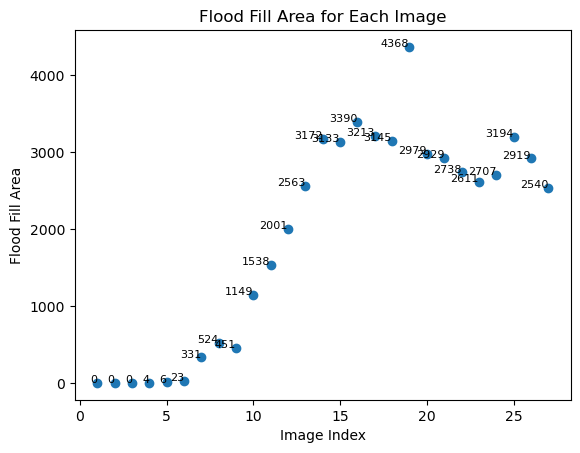

Saved scatter chart to flood_filled_images\flood_fill_area_scatter_chart.png


In [43]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Global variables
flood_fill_points = []
flood_fill_areas = []  # Store the areas of the flood-filled regions for each image
output_folder = 'flood_filled_images'  # Folder to save the output images

def select_point(event, x, y, flags, param):
    global flood_fill_points, image, mask, current_image_area

    if event == cv2.EVENT_LBUTTONDOWN:
        flood_fill_point = (x, y)
        flood_fill_points.append(flood_fill_point)
        if flood_fill_point:
            # Perform flood fill and compute the area
            num, _, _, _ = cv2.floodFill(image, mask, flood_fill_point, (255, 0, 255))  # Magenta color
            
            # Print the area of the current flood-filled region
            print(f"Flood Fill Area: {num} pixels")

            # Compute the area of the flood-filled region and add to the current image's total area
            current_image_area += num

            # Display the flood fill result
            cv2.imshow("Select Point for Flood Fill", image)

def interactive_flood_fill(image_path, output_path, window_width=500, window_height=400):
    global image, mask, flood_fill_points, current_image_area

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Resize the image to fit the window size if necessary
    height, width = image.shape[:2]
    if width > window_width or height > window_height:
        aspect_ratio = width / height
        if width > height:
            new_width = window_width
            new_height = int(window_width / aspect_ratio)
        else:
            new_height = window_height
            new_width = int(window_height * aspect_ratio)
        image = cv2.resize(image, (new_width, new_height))

    # Create a mask for flood fill
    mask = np.zeros((image.shape[0] + 2, image.shape[1] + 2), np.uint8)

    # Create a window and bind the mouse callback function
    cv2.namedWindow("Select Point for Flood Fill")
    cv2.setMouseCallback("Select Point for Flood Fill", select_point)

    # Reset the current image area before processing
    current_image_area = 0

    # Display the image and wait for a key press to exit
    while True:
        cv2.imshow("Select Point for Flood Fill", image)
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # ESC key to exit
            break

    cv2.destroyAllWindows()

    # Add the total area for the current image to the list of flood fill areas
    flood_fill_areas.append(current_image_area)

    # Save the result image
    cv2.imwrite(output_path, image)
    print(f"Saved flood filled image to {output_path}")

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Folder containing the images
input_folder = 'pixel_fungi'
window_width = 500
window_height = 400

# Process each image in the folder
for i in range(1, 28):
    image_path = os.path.join(input_folder, f"{i}_fungi.jpg")
    output_path = os.path.join(output_folder, f"{i}_flood_filled.jpg")
    print(f"Processing {image_path}")
    interactive_flood_fill(image_path, output_path, window_width, window_height)

# Compute growth rates
growth_rates = [flood_fill_areas[i+1] - flood_fill_areas[i] for i in range(len(flood_fill_areas) - 1)]

# Generate and save the scatter chart for growth rate area
plt.figure()
plt.scatter(range(1, len(flood_fill_areas) + 1), flood_fill_areas, marker='o')

# Annotate each point with the flood fill area
for i, area in enumerate(flood_fill_areas):
    plt.text(i + 1, area, f'{area}', fontsize=8, ha='right')

plt.xlabel('Image Index')
plt.ylabel('Flood Fill Area')
plt.title('Flood Fill Area for Each Image')
scatter_chart_path = os.path.join(output_folder, 'flood_fill_area_scatter_chart.png')
plt.savefig(scatter_chart_path)
plt.show()

print(f"Saved scatter chart to {scatter_chart_path}")

Processing pixel_fungi\1_fungi.jpg
Saved flood filled image to flood_filled_images2\1_flood_filled.jpg
Processing pixel_fungi\2_fungi.jpg
Saved flood filled image to flood_filled_images2\2_flood_filled.jpg
Processing pixel_fungi\3_fungi.jpg
Saved flood filled image to flood_filled_images2\3_flood_filled.jpg
Processing pixel_fungi\4_fungi.jpg
Flood Fill Area: 1 pixels
Flood Fill Area: 2 pixels
Saved flood filled image to flood_filled_images2\4_flood_filled.jpg
Processing pixel_fungi\5_fungi.jpg
Flood Fill Area: 13 pixels
Flood Fill Area: 7 pixels
Saved flood filled image to flood_filled_images2\5_flood_filled.jpg
Processing pixel_fungi\6_fungi.jpg
Flood Fill Area: 45 pixels
Flood Fill Area: 10 pixels
Flood Fill Area: 13 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 1 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 6 pixels
Flood Fill Area: 2 pixels
Flood Fill Area: 48 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 0 pixels
Saved flood filled image to f

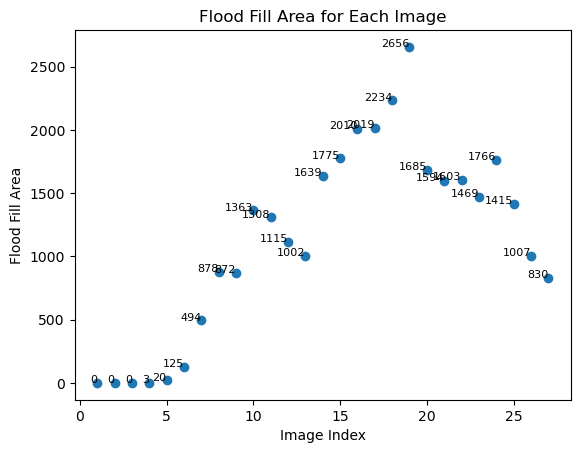

Saved scatter chart to flood_filled_images2\flood_fill_area_scatter_chart.png


In [46]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Global variables
flood_fill_points = []
flood_fill_areas = []  # Store the areas of the flood-filled regions for each image
output_folder = 'flood_filled_images2'  # Folder to save the output images

def select_point(event, x, y, flags, param):
    global flood_fill_points, image, mask, current_image_area

    if event == cv2.EVENT_LBUTTONDOWN:
        flood_fill_point = (x, y)
        flood_fill_points.append(flood_fill_point)
        if flood_fill_point:
            # Perform flood fill and compute the area
            num, _, _, _ = cv2.floodFill(image, mask, flood_fill_point, (255, 0, 255))  # Magenta color
            
            # Print the area of the current flood-filled region
            print(f"Flood Fill Area: {num} pixels")

            # Compute the area of the flood-filled region and add to the current image's total area
            current_image_area += num

            # Display the flood fill result
            cv2.imshow("Select Point for Flood Fill", image)

def interactive_flood_fill(image_path, output_path, window_width=500, window_height=400):
    global image, mask, flood_fill_points, current_image_area

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Resize the image to fit the window size if necessary
    height, width = image.shape[:2]
    if width > window_width or height > window_height:
        aspect_ratio = width / height
        if width > height:
            new_width = window_width
            new_height = int(window_width / aspect_ratio)
        else:
            new_height = window_height
            new_width = int(window_height * aspect_ratio)
        image = cv2.resize(image, (new_width, new_height))

    # Create a mask for flood fill
    mask = np.zeros((image.shape[0] + 2, image.shape[1] + 2), np.uint8)

    # Create a window and bind the mouse callback function
    cv2.namedWindow("Select Point for Flood Fill")
    cv2.setMouseCallback("Select Point for Flood Fill", select_point)

    # Reset the current image area before processing
    current_image_area = 0

    # Display the image and wait for a key press to exit
    while True:
        cv2.imshow("Select Point for Flood Fill", image)
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # ESC key to exit
            break

    cv2.destroyAllWindows()

    # Add the total area for the current image to the list of flood fill areas
    flood_fill_areas.append(current_image_area)

    # Save the result image
    cv2.imwrite(output_path, image)
    print(f"Saved flood filled image to {output_path}")

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Folder containing the images
input_folder = 'pixel_fungi'
window_width = 500
window_height = 400

# Process each image in the folder
for i in range(1, 28):
    image_path = os.path.join(input_folder, f"{i}_fungi.jpg")
    output_path = os.path.join(output_folder, f"{i}_flood_filled.jpg")
    print(f"Processing {image_path}")
    interactive_flood_fill(image_path, output_path, window_width, window_height)

# Compute growth rates
growth_rates = [flood_fill_areas[i+1] - flood_fill_areas[i] for i in range(len(flood_fill_areas) - 1)]

# Generate and save the scatter chart for growth rate area
plt.figure()
plt.scatter(range(1, len(flood_fill_areas) + 1), flood_fill_areas, marker='o')

# Annotate each point with the flood fill area
for i, area in enumerate(flood_fill_areas):
    plt.text(i + 1, area, f'{area}', fontsize=8, ha='right')

plt.xlabel('Image Index')
plt.ylabel('Flood Fill Area')
plt.title('Flood Fill Area for Each Image')
scatter_chart_path = os.path.join(output_folder, 'flood_fill_area_scatter_chart.png')
plt.savefig(scatter_chart_path)
plt.show()

print(f"Saved scatter chart to {scatter_chart_path}")

Processing pixel_fungi\1_fungi.jpg
Saved flood filled image to flood_filled_images3\1_flood_filled.jpg
Processing pixel_fungi\2_fungi.jpg
Saved flood filled image to flood_filled_images3\2_flood_filled.jpg
Processing pixel_fungi\3_fungi.jpg
Saved flood filled image to flood_filled_images3\3_flood_filled.jpg
Processing pixel_fungi\4_fungi.jpg
Flood Fill Area: 2 pixels
Saved flood filled image to flood_filled_images3\4_flood_filled.jpg
Processing pixel_fungi\5_fungi.jpg
Flood Fill Area: 2 pixels
Flood Fill Area: 1 pixels
Saved flood filled image to flood_filled_images3\5_flood_filled.jpg
Processing pixel_fungi\6_fungi.jpg
Flood Fill Area: 1 pixels
Flood Fill Area: 5 pixels
Flood Fill Area: 1 pixels
Flood Fill Area: 1 pixels
Flood Fill Area: 1 pixels
Flood Fill Area: 1 pixels
Flood Fill Area: 2 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 2 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 0 pixels
Flood Fill Area: 0 pixels
Saved fl

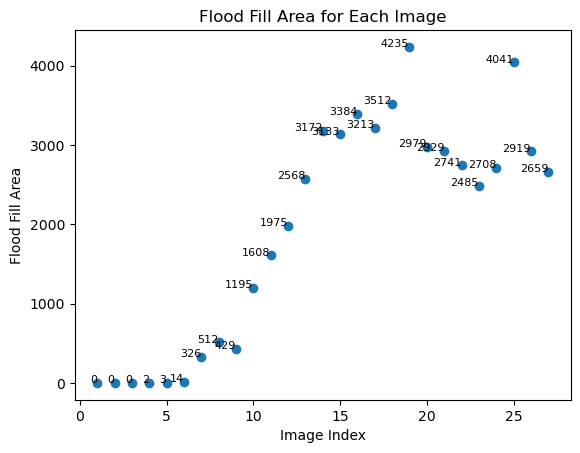

Saved scatter chart to flood_filled_images3\flood_fill_area_scatter_chart.png


In [48]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Global variables
flood_fill_points = []
flood_fill_areas = []  # Store the areas of the flood-filled regions for each image
output_folder = 'flood_filled_images3'  # Folder to save the output images

def select_point(event, x, y, flags, param):
    global flood_fill_points, image, mask, current_image_area

    if event == cv2.EVENT_LBUTTONDOWN:
        flood_fill_point = (x, y)
        flood_fill_points.append(flood_fill_point)
        if flood_fill_point:
            # Perform flood fill and compute the area
            num, _, _, _ = cv2.floodFill(image, mask, flood_fill_point, (255, 0, 255))  # Magenta color
            
            # Print the area of the current flood-filled region
            print(f"Flood Fill Area: {num} pixels")

            # Compute the area of the flood-filled region and add to the current image's total area
            current_image_area += num

            # Display the flood fill result
            cv2.imshow("Select Point for Flood Fill", image)

def interactive_flood_fill(image_path, output_path, window_width=500, window_height=400):
    global image, mask, flood_fill_points, current_image_area

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Resize the image to fit the window size if necessary
    height, width = image.shape[:2]
    if width > window_width or height > window_height:
        aspect_ratio = width / height
        if width > height:
            new_width = window_width
            new_height = int(window_width / aspect_ratio)
        else:
            new_height = window_height
            new_width = int(window_height * aspect_ratio)
        image = cv2.resize(image, (new_width, new_height))

    # Create a mask for flood fill
    mask = np.zeros((image.shape[0] + 2, image.shape[1] + 2), np.uint8)

    # Create a window and bind the mouse callback function
    cv2.namedWindow("Select Point for Flood Fill")
    cv2.setMouseCallback("Select Point for Flood Fill", select_point)

    # Reset the current image area before processing
    current_image_area = 0

    # Display the image and wait for a key press to exit
    while True:
        cv2.imshow("Select Point for Flood Fill", image)
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # ESC key to exit
            break

    cv2.destroyAllWindows()

    # Add the total area for the current image to the list of flood fill areas
    flood_fill_areas.append(current_image_area)

    # Save the result image
    cv2.imwrite(output_path, image)
    print(f"Saved flood filled image to {output_path}")

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Folder containing the images
input_folder = 'pixel_fungi'
window_width = 500
window_height = 400

# Process each image in the folder
for i in range(1, 28):
    image_path = os.path.join(input_folder, f"{i}_fungi.jpg")
    output_path = os.path.join(output_folder, f"{i}_flood_filled.jpg")
    print(f"Processing {image_path}")
    interactive_flood_fill(image_path, output_path, window_width, window_height)

# Compute growth rates
growth_rates = [flood_fill_areas[i+1] - flood_fill_areas[i] for i in range(len(flood_fill_areas) - 1)]

# Generate and save the scatter chart for growth rate area
plt.figure()
plt.scatter(range(1, len(flood_fill_areas) + 1), flood_fill_areas, marker='o')

# Annotate each point with the flood fill area
for i, area in enumerate(flood_fill_areas):
    plt.text(i + 1, area, f'{area}', fontsize=8, ha='right')

plt.xlabel('Image Index')
plt.ylabel('Flood Fill Area')
plt.title('Flood Fill Area for Each Image')
scatter_chart_path = os.path.join(output_folder, 'flood_fill_area_scatter_chart.png')
plt.savefig(scatter_chart_path)
plt.show()

print(f"Saved scatter chart to {scatter_chart_path}")

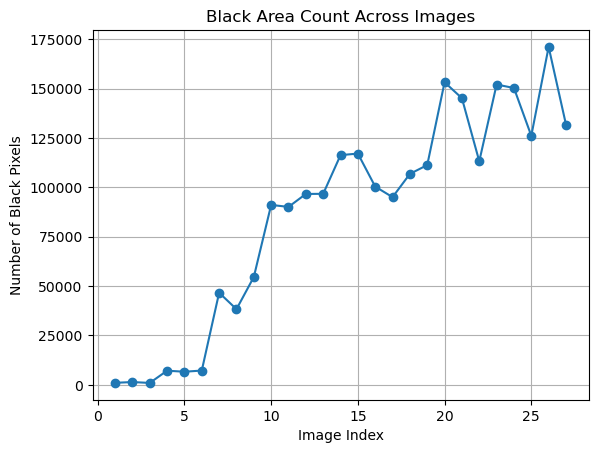

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Folder containing the processed images
output_fungi_folder = 'pixel_fungi'

# List to store the number of black pixels for each image
black_pixel_counts = []

# Count black pixels in each saved image
for i in range(1, 28):
    image_path = os.path.join(output_fungi_folder, f"{i}_fungi.jpg")
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is not None:
        black_pixel_count = np.sum(image == 0)
        black_pixel_counts.append(black_pixel_count)
    else:
        print(f"Error loading image: {image_path} (file may be missing or corrupted)")
        black_pixel_counts.append(0)  # Append 0 for missing images

# Plot the black pixel counts
plt.figure()
plt.title("Black Area Count Across Images")
plt.xlabel("Image Index")
plt.ylabel("Number of Black Pixels")
plt.plot(range(1, 28), black_pixel_counts, marker='o')
plt.grid(True)
plt.show()

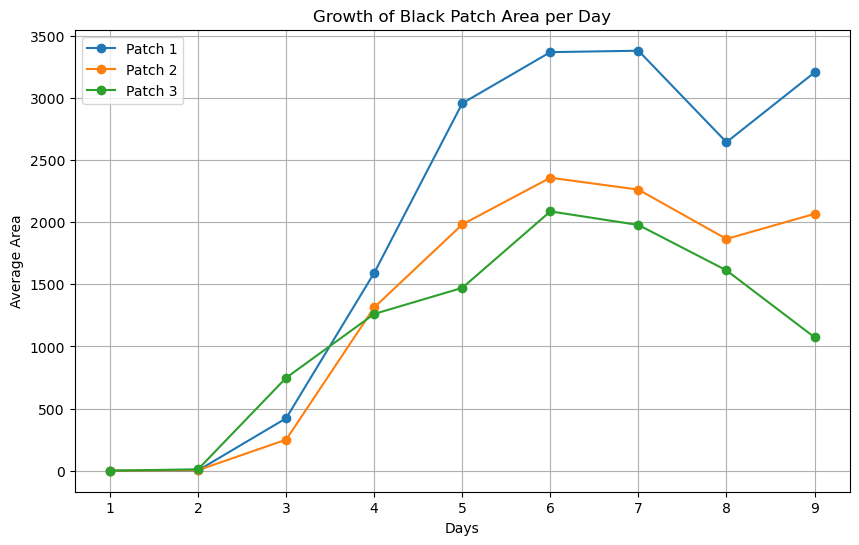

In [2]:
import matplotlib.pyplot as plt

# Data
days = [1, 2, 3, 4, 5, 6, 7, 8, 9]
patch1 = [0, 2.5, 422.33, 1592.67, 2957.67, 3369.67, 3381.00, 2644.67, 3206.33]
patch2 = [0, 4.5, 250.00, 1314.33, 1982.33, 2358.67, 2262.67, 1865.67, 2067.67]
patch3 = [0, 11.5, 748.00, 1262.00, 1472.00, 2087.67, 1978.33, 1612.67, 1074.00]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(days, patch1, marker='o', label='Patch 1')
plt.plot(days, patch2, marker='o', label='Patch 2')
plt.plot(days, patch3, marker='o', label='Patch 3')

plt.xlabel('Days')
plt.ylabel('Average Area')
plt.title('Growth of Black Patch Area per Day')
plt.legend()
plt.grid(True)

# Save the plot as an image file
plt.savefig('black_patch_growth.png')

# Show the plot
plt.show()

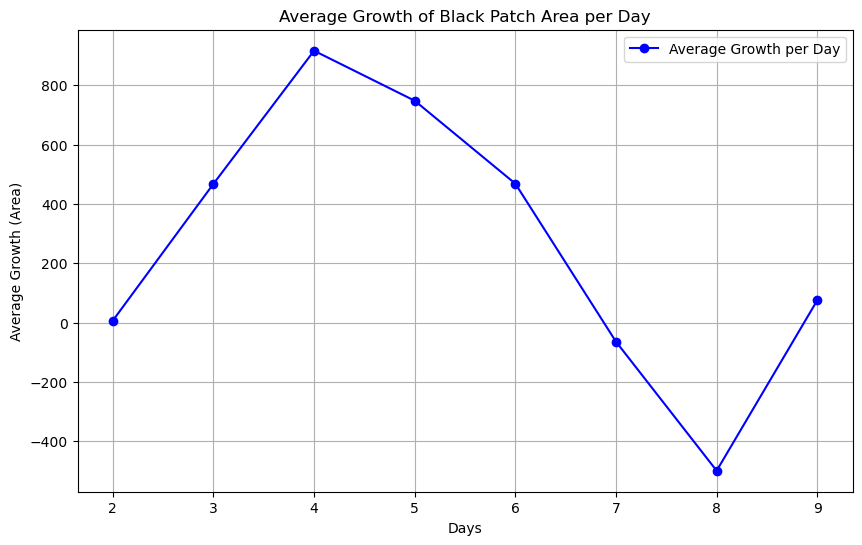

In [3]:
import matplotlib.pyplot as plt

# Data
days = [1, 2, 3, 4, 5, 6, 7, 8, 9]
patch1 = [0, 2.5, 422.33, 1592.67, 2957.67, 3369.67, 3381.00, 2644.67, 3206.33]
patch2 = [0, 4.5, 250.00, 1314.33, 1982.33, 2358.67, 2262.67, 1865.67, 2067.67]
patch3 = [0, 11.5, 748.00, 1262.00, 1472.00, 2087.67, 1978.33, 1612.67, 1074.00]

# Calculate daily growth for each patch
growth_patch1 = [patch1[i] - patch1[i-1] for i in range(1, len(patch1))]
growth_patch2 = [patch2[i] - patch2[i-1] for i in range(1, len(patch2))]
growth_patch3 = [patch3[i] - patch3[i-1] for i in range(1, len(patch3))]

# Calculate the average growth per day
average_growth_per_day = [(growth_patch1[i] + growth_patch2[i] + growth_patch3[i]) / 3 for i in range(len(growth_patch1))]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(days[1:], average_growth_per_day, marker='o', label='Average Growth per Day', color='blue')

plt.xlabel('Days')
plt.ylabel('Average Growth (Area)')
plt.title('Average Growth of Black Patch Area per Day')
plt.legend()
plt.grid(True)

# Save the plot as an image file
plt.savefig('average_black_patch_growth.png')

# Show the plot
plt.show()